### What is the most optimal skill to learn for Data Analysts?
Methodology : 

1. Visualize median salary vs percent skill demand
2. Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da = df[(df['job_title_short'] == 'Data Analyst')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_da = df_da.dropna(subset=['salary_year_avg'])

df_da_exploded = df_da.explode('job_skills')

df_da_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [3]:
# using df_da find the count of skills and also the median salary for each skill
df_da_skills = df_da_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_da)  # Find count of Data Analyst jobs in US with salary info

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_count * 100

df_da_skills = df_da_skills[df_da_skills['skill_count'] > 0]

df_da_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
...,...,...,...
selenium,1,82500.0,0.018345
colocation,1,67500.0,0.018345
cordova,1,113269.5,0.018345


In [11]:
skill_limit = 8

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_limit]

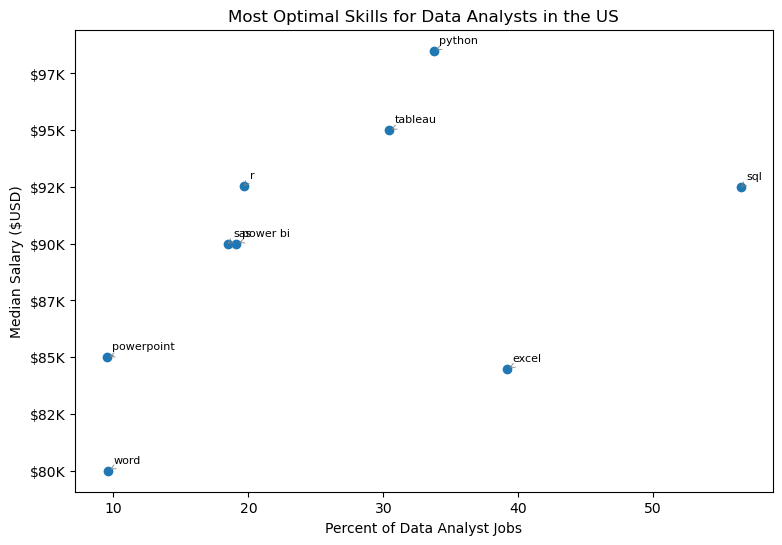

In [16]:
#plot 

plt.figure(figsize=(9,6))
plt.scatter(df_da_skills_high_demand['skill_percent'],
            df_da_skills_high_demand['median_salary'])

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.gca().yaxis.set_major_formatter(lambda y, _: f'${int(y/1000)}K')

# one-liner per label
for skill, x, y in zip(df_da_skills_high_demand.index,
                       df_da_skills_high_demand['skill_percent'],
                       df_da_skills_high_demand['median_salary']):
    plt.annotate(skill, (x, y),
                 xytext=(4, 4), textcoords='offset points',
                 fontsize=8, ha='left', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='gray', lw=.6))

plt.show()